<a href="https://colab.research.google.com/github/jlrocam/my-first-binder/blob/main/Melano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 31 images belonging to 2 classes.
31
Found 7 images belonging to 2 classes.
7
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.5806 - loss: 0.6824 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 1.0000 - val_loss: 5.0406e-07
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.9714e-05 - val_accuracy: 1.0000 - val_loss: 7.6857e-11
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 1.3675e-08 - val_accuracy: 1.0000 - val_loss: 6.3741e-15
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 2.4009e-10 - val_accuracy: 1.0000 - val_loss: 3.3369e-19
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 9.2302e-13 - val_accuracy: 1.0000 - val_loss: 1.3777e-23
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 6.4123e-19 - val_accuracy: 1.0000 - val_loss: 5.3482e-28
Epoch 8/10


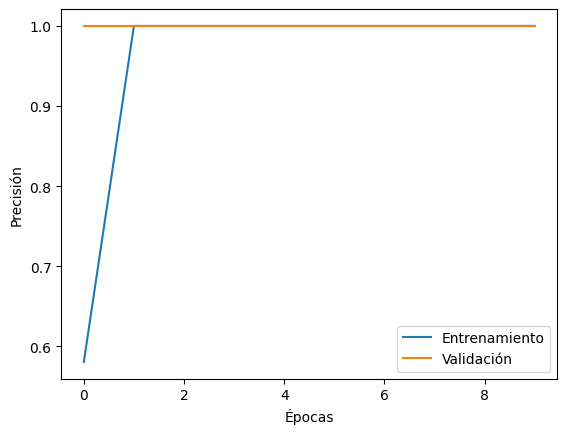

In [16]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


# Definir parámetros
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Directorios de imágenes
train_dir = '/content/images'  # Path to training images

# Make sure this directory exists and contains the images
# **Check if the directory and subdirectories exist**
if not os.path.exists(train_dir):
    raise ValueError(f"Training directory not found: {train_dir}")
for class_name in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, class_name)
    # Skip hidden directories like '.ipynb_checkpoints'
    if class_name.startswith('.'):
        continue
    if not os.path.isdir(class_dir):
        continue  # Skip non-directory entries
    if len(os.listdir(class_dir)) == 0:
        raise ValueError(f"Class directory '{class_name}' is empty.")

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Entrenamiento
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Change to 'binary' or 'categorical' for classification
    subset='training',
    shuffle=True,
    seed=42  # For reproducibility
)
print(train_generator.samples)

# Validación
val_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    color_mode='rgb',
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Change to 'binary' or 'categorical' for classification
    subset='validation',
    shuffle=True,
    seed=42  # Use the same seed for consistency
)

print(val_generator.samples)

# Definir modelo CNN
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar modelo
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Guardar modelo
model.save("/content/model/melanoma_model.keras")


# Graficar resultados
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()